In [2]:
import pandas as pd
import seaborn as sns


In [4]:
df=pd.read_csv('Warsaw_rent_cleaned.csv')
df.head()

,squareMeters,rooms,latitude,longitude,centreDistance,poiCount,hasParkingSpace,hasBalcony,hasSecurity,hasStorageRoom,price,date
0,47.0,2.0,52.257912,20.968610,3.76,33.0,yes,yes,no,no,5000,November 2023
1,27.0,1.0,52.249800,21.035200,2.95,33.0,yes,yes,no,no,2950,November 2023
2,51.0,2.0,52.222864,21.009959,1.08,85.0,no,yes,no,no,3700,November 2023
3,50.0,3.0,52.224948,21.012136,0.95,124.0,no,no,no,no,5000,November 2023
4,39.8,2.0,52.216513,21.041474,3.09,6.0,no,no,no,no,4500,November 2023


C:\Users\julia\AppData\Local\Temp\ipykernel_11232\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

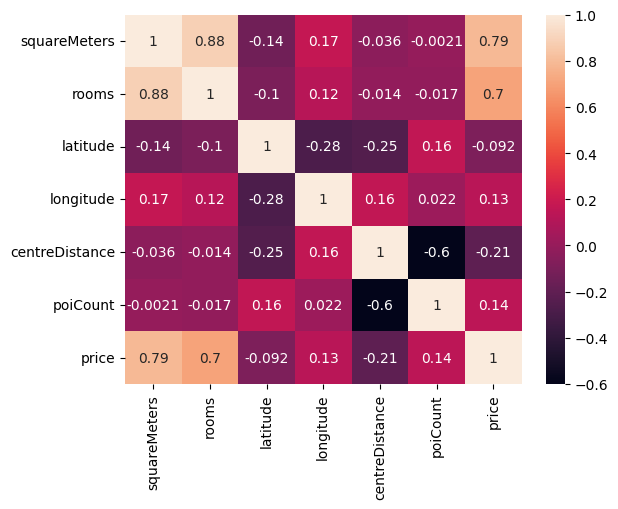

In [9]:
sns.heatmap(df.corr(), annot = True)

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Inicjalizacja modeli
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor()

# Trenowanie modeli na zbiorze treningowym
model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)


ValueError: could not convert string to float: 'yes'

In [ ]:
# Prognozowanie cen dla zbioru testowego
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

# Ocena modeli
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'MSE dla regresji liniowej: {mse_lr}')
print(f'MSE dla drzewa decyzyjnego: {mse_dt}')
print(f'MSE dla lasu losowego: {mse_rf}')
